In [156]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [157]:
# Load the data 
# Time that the boiler is on, the minimum temperature before and the maximum temperature after heating

df = pd.read_csv("hot_water_data.csv")
df['duration'] = df['duration'] / 60.0 #convert seconds to minutes
df.head(10)

,duration,temp_before,temp_after
0,18.233333,21.00,34.75
1,13.850000,24.50,34.00
2,22.866667,20.00,33.00
3,13.900000,24.50,34.50
4,102.233333,30.75,39.50
5,17.866667,23.25,33.50
6,25.033333,20.00,31.25
7,16.000000,30.00,34.25
8,0.516667,28.75,34.50
9,66.450000,28.75,42.00


In [158]:
from lmfit import minimize, Parameters, fit_report, Model

from sklearn.metrics import mean_squared_error

In [159]:
%matplotlib notebook

In [160]:
df.head()

,duration,temp_before,temp_after
0,18.233333,21.00,34.75
1,13.850000,24.50,34.00
2,22.866667,20.00,33.00
3,13.900000,24.50,34.50
4,102.233333,30.75,39.50


<IPython.core.display.Javascript object>


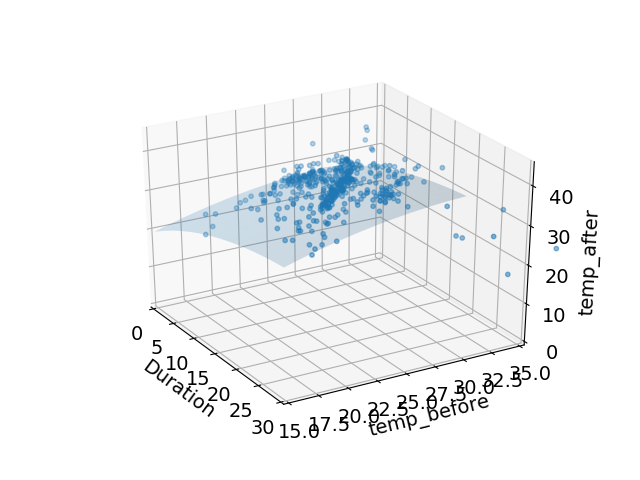

mean squared error 3.7211930668636732


In [195]:
# multivariate linear regression. 

def modFn(x, a1, a2, a3,  b1, b2, b3, offset):
    out = a1*x['duration'] + a2*x['duration']**2 + a3*x['duration']**3 
    out += b1*x['temp_before'] + b2*x['temp_before']**2 + b3*x['temp_before']**3
    out += offset
    return out

p=Parameters()
p.add('a1', vary=True, value=0)
p.add('a2', vary=True, value=0)
p.add('a3', vary=True, value=0)
p.add('b1', vary=True, value=0)
p.add('b2', vary=True, value=0)
p.add('b3', vary=False, value=0)
p.add('offset', vary=False, value=0)

mod = Model(modFn)

result = mod.fit(df['temp_after'], p, x=df[['duration', 'temp_before']])
p = result.params


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot data
ax.scatter(df['duration'], df['temp_before'], df['temp_after'], s=10 )

#predict surface
X,Y = np.meshgrid(np.linspace(0,30,20), np.linspace(15,30,20))
A = pd.DataFrame(np.array([X.flatten(), Y.flatten()]).T, columns=['duration','temp_before'])  
Z = mod.eval(p, x=A)
Z = np.reshape(np.array(Z), np.shape(X))
ax.plot_surface(X,Y,Z,  alpha=0.2)



ax.set_xlim(0,30)
ax.set_ylim(15,35)
ax.set_zlim(0,45)

ax.set_xlabel('Duration')
ax.set_zlabel('temp_after')
ax.set_ylabel('temp_before')

plt.show()

print "mean squared error",  mean_squared_error(df['temp_after'], mod.eval(p, x=df[['duration', 'temp_before']]))
result
